In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [313]:
df = pd.read_csv('Data Sukun Jual.csv', sep=';')
df

,id,kunci,trig,tanggal,jam,noorder,kdkg,nota,kdptg,kdjlr,...,hgjual,total,alebih,tlebih,lat,lng,akurat,acc,tglacc,user
0,2,C32G000480-22022021-C32P0007-R24-KF-20-7635-79...,0,02/22/2021,10/19/2023,OR-C32P0007-20210222-01,KF,C32G000480-22022021,C32P0007,C32098,...,7950,159000,315,6300,-17.892.029,1.034.110.245,5,1,02/25/2021,android
1,3,C32G000481-22022021-C32P0007-R24-KF-3-7635-795...,0,02/22/2021,10/19/2023,OR-C32P0007-20210222-01,KF,C32G000481-22022021,C32P0007,C32098,...,7950,23850,315,945,-17.933.325,1.034.107.938,4,1,02/25/2021,android
2,4,C32G000482-22022021-C32P0007-R24-KF-20-7635-79...,0,02/22/2021,10/19/2023,OR-C32P0007-20210222-01,KF,C32G000482-22022021,C32P0007,C32098,...,7950,159000,315,6300,-1.792.946,1.034.087.392,4,1,02/25/2021,android
3,5,C32G001575-22022021-C32P0007-R37-KF-10-4301-44...,0,02/22/2021,10/19/2023,OR-C32P0007-20210222-01,KF,C32G001575-22022021,C32P0007,C32098,...,4450,44500,149,1490,-1.791.146,1.034.032.551,4,1,02/25/2021,android
4,6,C32G001575-22022021-C32P0007-R24-KF-3-7635-795...,0,02/22/2021,10/19/2023,OR-C32P0007-20210222-01,KF,C32G001575-22022021,C32P0007,C32098,...,7950,23850,315,945,-17.911.445,1.034.032.534,4,1,02/25/2021,android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28319,29159,C32G005822-29042022-C32P0030-R36-KF-20-4726-49...,0,04/29/2022,10/19/2023,OR-C32P0030-20220411-01,KF,C32G005822-29042022,C32P0030,C32093,...,4900,98000,174,3480,-13.219.932,1.033.266.233,5,1,04/29/2022,android
28320,29160,C32G006092-29042022-C32P0030-R36-KF-10-4726-49...,0,04/29/2022,10/19/2023,OR-C32P0030-20220411-01,KF,C32G006092-29042022,C32P0030,C32093,...,4900,49000,174,1740,-13.338.348,1.033.391.411,5,1,04/29/2022,android
28321,29161,C32G004219-29042022-C32P0031-R35-US-1-8221-100...,0,04/29/2022,10/19/2023,OR-C32P0031-20220408-01,US,C32G004219-29042022,C32P0031,C32200,...,10000,10000,1779,1779,-0.8248398,1.034.678.567,5,1,04/29/2022,android
28322,29162,C32G004219-29042022-C32P0031-R24-US-3-7955-900...,0,04/29/2022,10/19/2023,OR-C32P0031-20220401-01,US,C32G004219-29042022,C32P0031,C32200,...,9000,27000,1045,3135,-0.8248395,1.034.678.568,5,1,04/29/2022,android


In [314]:
df.dtypes

id          int64
kunci      object
trig        int64
tanggal    object
jam        object
noorder    object
kdkg       object
nota       object
kdptg      object
kdjlr      object
kdplg      object
kdrkk      object
cang        int64
jumlah      int64
hgkirim     int64
hgjual      int64
total       int64
alebih      int64
tlebih      int64
lat        object
lng        object
akurat      int64
acc         int64
tglacc     object
user       object
dtype: object

In [315]:
day = "2023-12-01"
day = pd.to_datetime(day)
df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')
df_filtered = df[df['tanggal'].dt.year.between(2020, 2023)]
recency = df_filtered.groupby(["kdplg"]).agg({"tanggal": lambda x: ((day - x.max()).days)})

In [316]:
print(df['tanggal'].dtype)

datetime64[ns]


In [317]:
print(df[df['tanggal'].isna()])

          id                                              kunci  trig tanggal  \
579      586  C32G002842-01032021-C32P0005-R08-DK-50-16471-1...     1     NaT   
580      588  C32G001125-01032021-C32P0005-R29-DK-20-11051-1...     0     NaT   
581      589  C32G001114-01032021-C32P0005-R07-DK-300-12786-...     0     NaT   
582      590  C32G001114-01032021-C32P0005-R08-DK-600-16471-...     0     NaT   
583      591  C32G001116-01032021-C32P0005-R08-DK-200-16471-...     0     NaT   
...      ...                                                ...   ...     ...   
27408  28236  C32G000582-12042022-C32P0007-R24-KF-10-7955-80...     0     NaT   
27409  28237  C32G000583-12042022-C32P0007-R24-KF-10-7955-80...     0     NaT   
27410  28238  C32G000579-12042022-C32P0007-R24-KF-10-7955-80...     0     NaT   
27411  28239  C32G000569-12042022-C32P0007-R24-KF-10-7955-80...     0     NaT   
27412  28240  C32G001617-12042022-C32P0007-R38-KF-1-11500-10...     0     NaT   

              jam          

In [318]:
recency.head(20)

,tanggal
kdplg,
0,584
C32G000001,793
C32G000002,620
C32G000003,653
C32G000004,835
C32G000005,793
C32G000006,611
C32G000007,611
C32G000008,653


In [319]:
#frequency


freq=df.drop_duplicates(subset="nota").groupby(["kdplg"])[["nota"]].count()
freq.head(5)

,nota
kdplg,
0,35
C32G000001,8
C32G000002,11
C32G000003,9
C32G000004,5


In [320]:
#monetary

df["total"]=df["jumlah"]*df["hgjual"]

In [321]:
money=df.groupby(["kdplg"])[["total"]].sum()
money

,total
kdplg,
0,11560076
C32G000001,362750
C32G000002,779700
C32G000003,2017600
C32G000004,547700
...,...
C32G006229,14700
C32G006232,16100
C32G006234,922500


In [323]:
RFM=pd.concat([recency,freq,money], axis=1)
recency.columns=["Recency"]
freq.columns=["Frequency"]
money.columns=["Monetary"]
RFM

,Recency,Frequency,Monetary
kdplg,,,
0,584.0,35,11560076
C32G000001,793.0,8,362750
C32G000002,620.0,11,779700
C32G000003,653.0,9,2017600
C32G000004,835.0,5,547700
...,...,...,...
C32G005956,NaN,1,15600
C32G006003,NaN,1,4900
C32G006005,NaN,1,10700


In [324]:
print(RFM.isna().sum())

Recency      317
Frequency      0
Monetary       0
dtype: int64


In [325]:
RFM = RFM.fillna(0)

In [326]:
print(RFM.isna().sum())

Recency      0
Frequency    0
Monetary     0
dtype: int64


In [327]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

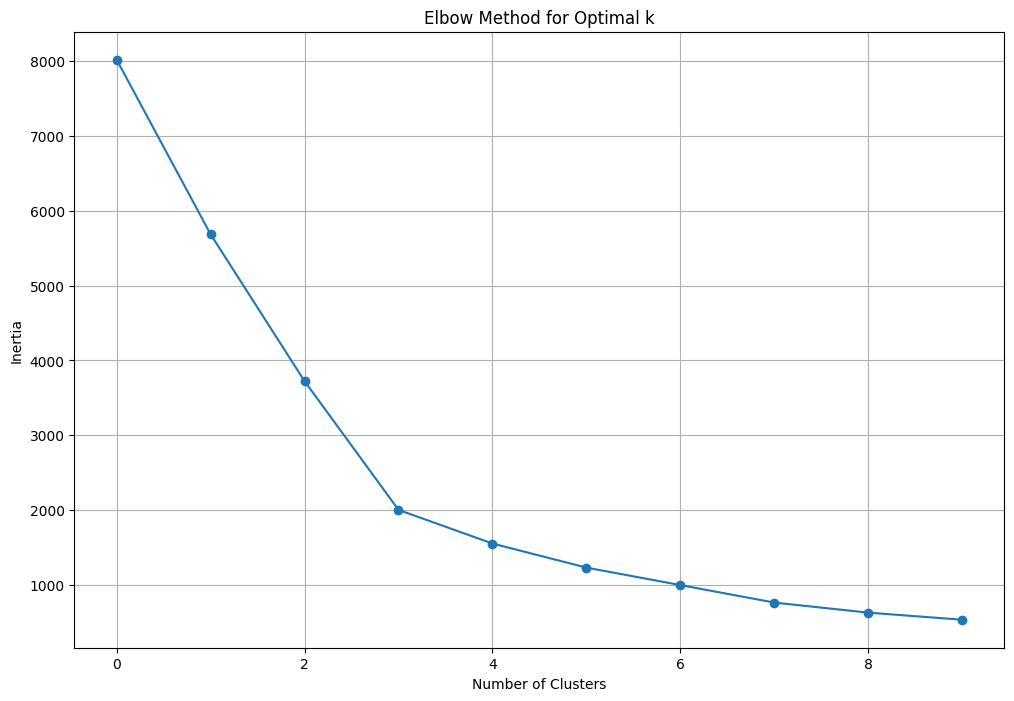

In [328]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,11):
    kmeans = KMeans(n_clusters=i, random_state=20)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o")
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


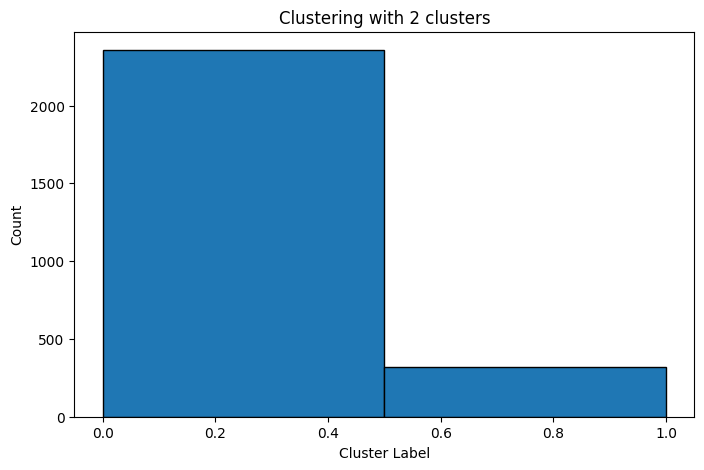

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


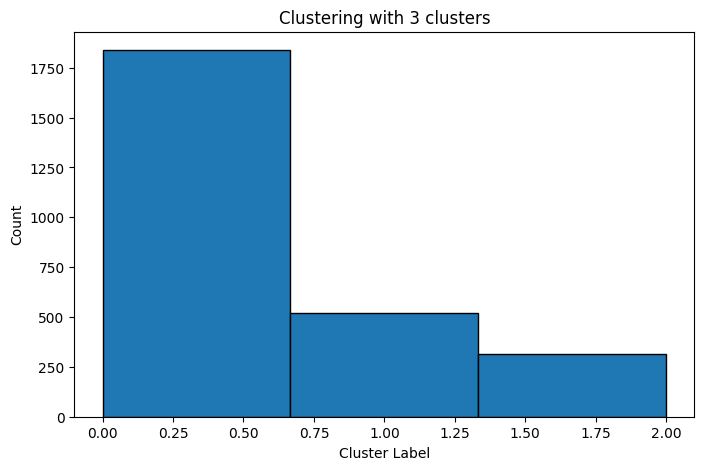

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


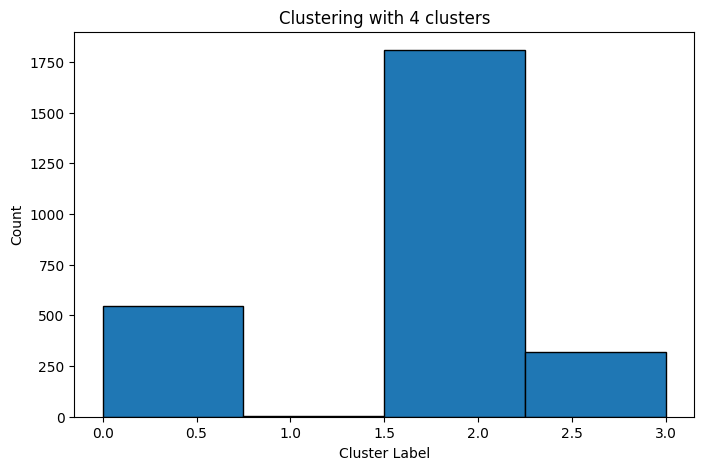

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


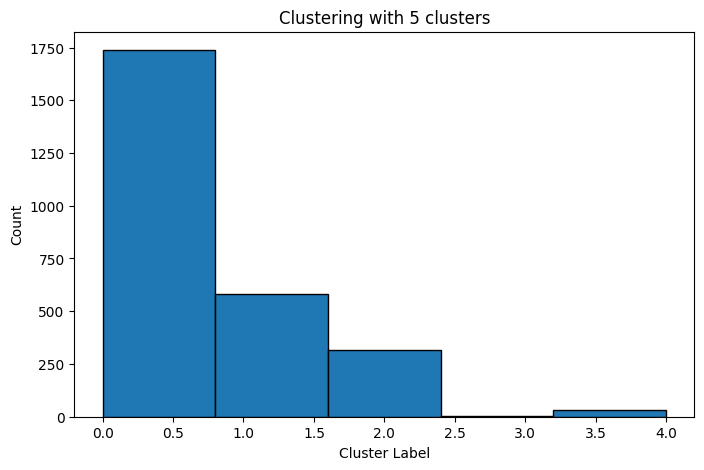

In [346]:
for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, random_state=20)
    kmeans.fit(scaled)
    labels = kmeans.labels_
    
    plt.figure(figsize=(8, 5))
    plt.title(f"Clustering with {i} clusters")
    plt.hist(labels, bins=i, edgecolor='black')
    plt.xlabel('Cluster Label')
    plt.ylabel('Count')
    plt.show()

In [330]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(scaled)
RFM["Kluster"]=(kmeans.labels_+1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [331]:
RFM

,Recency,Frequency,Monetary,Kluster
kdplg,,,,
0,584.0,35,11560076,1
C32G000001,793.0,8,362750,2
C32G000002,620.0,11,779700,2
C32G000003,653.0,9,2017600,2
C32G000004,835.0,5,547700,2
...,...,...,...,...
C32G005956,0.0,1,15600,3
C32G006003,0.0,1,4900,3
C32G006005,0.0,1,10700,3


In [332]:
final=RFM.groupby(["Kluster"])[["Recency", "Frequency", "Monetary"]].mean()
final

,Recency,Frequency,Monetary
Kluster,,,
1,614.715074,20.420956,8.320962e+06
2,742.613385,4.147677,4.118075e+05
3,0.000000,1.182965,1.002837e+05
4,599.000000,28.400000,3.335073e+08


In [334]:
def func(row):
    if row["Kluster"]==1:
        return 'Classic'
    if row["Kluster"]==2:
        return 'Silver'
    if row["Kluster"]==3:
        return 'Gold'
    elif row["Kluster"]==4:
        return 'Platinum'
    else:
        return 'tidak diketahui'

In [335]:
RFM['group']=RFM.apply(func, axis=1)

In [336]:
RFM

,Recency,Frequency,Monetary,Kluster,group
kdplg,,,,,
0,584.0,35,11560076,1,Classic
C32G000001,793.0,8,362750,2,Silver
C32G000002,620.0,11,779700,2,Silver
C32G000003,653.0,9,2017600,2,Silver
C32G000004,835.0,5,547700,2,Silver
...,...,...,...,...,...
C32G005956,0.0,1,15600,3,Gold
C32G006003,0.0,1,4900,3,Gold
C32G006005,0.0,1,10700,3,Gold


In [337]:
result=RFM.group.value_counts()

In [338]:
result

group
Silver      1808
Classic      544
Gold         317
Platinum       5
Name: count, dtype: int64

<Axes: ylabel='group'>

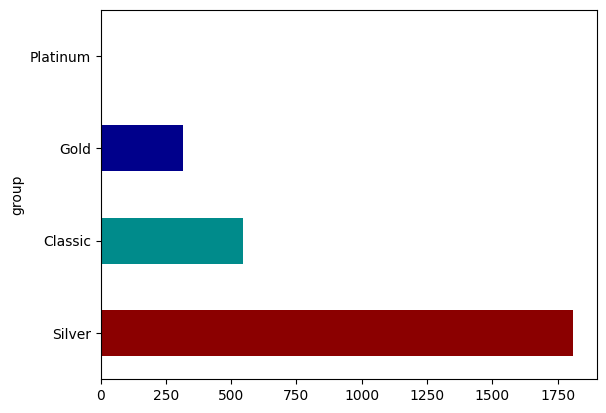

In [344]:
result.plot(kind="barh", color=["DarkRed","DarkCyan","DarkBlue","Yellow"])